# 목적
- evaldata.csv : 학생들의 project(작품)들을 여러 평가자가 3가지 평가항목(score1, scroe2, score2)에 대하여, 5점 척도로 평가한 데이터
- 표준정규화와 min-max 정규화를 시행하여, 각 정규화 방법 별로 우수한 작품 5개를 선발하시오
- 제한 : pandas 라이브러리를 사용하고, for 또는 while loop 명령과  iloc, loc 등의 pandas 함수 사용 금지

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 데이터 로드

In [37]:
evaldata = pd.read_csv('evaldata.csv')
evaldata.head()

,index,evaluator,project,score1,score2,score3
0,0,A,126,4,3,2
1,1,A,127,3,3,3
2,2,A,128,3,2,2
3,3,A,129,4,3,3
4,4,A,130,4,3,3


### Min-Max 정규화
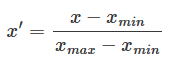

In [21]:
def min_max(df):
    return (df - df.min())/(df.max() - df.min())
score1 = min_max(evaldata.score1)
score1.head()

0    0.75
1    0.50
2    0.50
3    0.75
4    0.75
Name: score1, dtype: float64

### 표준 정규화
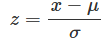

In [22]:
def standardization(df):
    return (df - df.mean()) / df.std()
score1 = standardization(evaldata.score1)
score1.head()

0    0.527720
1   -0.710024
2   -0.710024
3    0.527720
4    0.527720
Name: score1, dtype: float64

### Data Check

In [35]:
evaldata.isnull().any()

index        False
evaluator    False
project      False
score1       False
score2       False
score3       False
dtype: bool

In [38]:
evaldata['evaluator'].value_counts()

evaluator
A    9
D    9
G    9
E    9
H    9
L    9
O    9
M    9
F    8
C    8
B    8
I    8
J    8
K    8
N    8
X    1
Name: count, dtype: int64

In [39]:
evaldata['project'].value_counts()

project
109    4
110    4
111    4
114    4
107    4
116    4
115    4
112    4
113    4
128    3
126    3
133    3
134    3
131    3
132    3
130    3
129    3
127    3
101    3
102    3
103    3
105    3
104    3
106    3
108    3
201    3
202    3
203    3
204    3
205    3
206    3
207    3
208    3
209    3
117    2
118    2
119    2
120    2
121    2
122    2
123    2
124    2
125    2
Name: count, dtype: int64

### Get Top 5

In [45]:
evaldata['score_sum'] = evaldata.score1 + evaldata.score2 + evaldata.score3
evaldata

,index,evaluator,project,score1,score2,score3,score_sum
0,0,A,126,4,3,2,9
1,1,A,127,3,3,3,9
2,2,A,128,3,2,2,7
3,3,A,129,4,3,3,10
4,4,A,130,4,3,3,10
...,...,...,...,...,...,...,...
124,124,O,121,5,4,5,14
125,125,O,122,4,3,4,11
126,126,O,123,3,3,3,9
127,127,O,124,3,3,3,9


In [46]:
evaldata['min-max'] = min_max(evaldata['score_sum'])
evaldata['standardization'] = standardization(evaldata['score_sum'])
evaldata

,index,evaluator,project,score1,score2,score3,score_sum,min-max,standardization
0,0,A,126,4,3,2,9,0.500000,-0.740967
1,1,A,127,3,3,3,9,0.500000,-0.740967
2,2,A,128,3,2,2,7,0.333333,-1.716322
3,3,A,129,4,3,3,10,0.583333,-0.253290
4,4,A,130,4,3,3,10,0.583333,-0.253290
...,...,...,...,...,...,...,...,...,...
124,124,O,121,5,4,5,14,0.916667,1.697419
125,125,O,122,4,3,4,11,0.666667,0.234388
126,126,O,123,3,3,3,9,0.500000,-0.740967
127,127,O,124,3,3,3,9,0.500000,-0.740967


### Get Min-Mix Top 5

In [69]:
evaldata.sort_values(by=['min-max', 'index'], ascending=[False, False]).head(5)

,index,evaluator,project,score1,score2,score3,score_sum,min-max,standardization
97,97,L,204,5,5,5,15,1.000000,2.185097
92,92,K,108,5,5,5,15,1.000000,2.185097
9,9,B,109,5,5,5,15,1.000000,2.185097
128,128,O,125,5,4,5,14,0.916667,1.697419
124,124,O,121,5,4,5,14,0.916667,1.697419


In [67]:
evaldata.sort_values(by=['min-max', 'index'], ascending=[False, True])[['index', 'project']].head(5)

,index,project
9,9,109
92,92,108
97,97,204
23,23,107
63,63,129


### Get Standardization Top 5

In [66]:
evaldata.sort_values(by=['standardization', 'index'], ascending=[False, True])[['index', 'project']].head(5)

,index,project
9,9,109
92,92,108
97,97,204
23,23,107
63,63,129


# 정리

In [ ]:
import pandas as pd

evaldata = pd.read_csv('evaldata.csv')
evaldata.head()

def min_max(df):
    return (df - df.min())/(df.max() - df.min())
def standardization(df):
    return (df - df.mean()) / df.std()

evaldata['score_sum'] = evaldata.score1 + evaldata.score2 + evaldata.score3
evaldata['min-max'] = min_max(evaldata['score_sum'])
evaldata['standardization'] = standardization(evaldata['score_sum'])

top5_min_max = evaldata.sort_values(by=['min-max', 'index'], ascending=[False, True])[['index', 'project']].head(5)
top5_standardization = evaldata.sort_values(by=['standardization', 'index'], ascending=[False, True])[['index', 'project']].head(5)

print("점수는 동일해도 index가 낮은 순으로 top5 선정")
print(f"\nTop5 Min-Max\n{top5_min_max}")
print(f"\nTop5 Standardization\n{top5_standardization}")

점수는 동일해도 index가 낮은 순으로 top5 선정

Top5 Min-Max
    index  project
9       9      109
92     92      108
97     97      204
23     23      107
63     63      129

Top5 Standardization
    index  project
9       9      109
92     92      108
97     97      204
23     23      107
63     63      129
